In [2]:
# importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [75]:
df_Pol = df[df['job_country']=='Poland'].copy()
df_skills = df_Pol.explode('job_skills').copy()

In [76]:
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

In [77]:
job_titles = df_skills_count['job_title_short'].unique().tolist()[:3]
job_titles = sorted(job_titles)

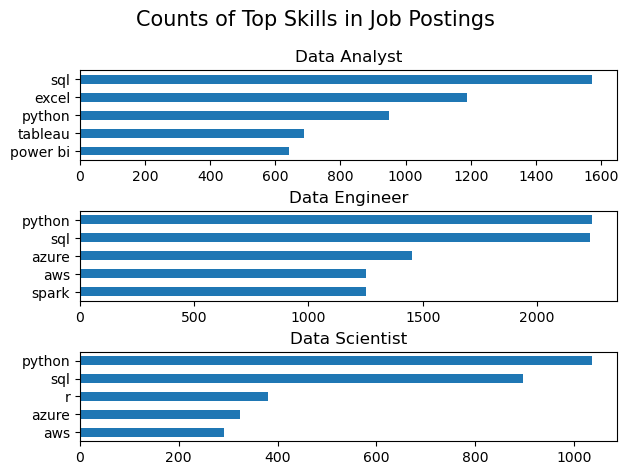

In [78]:
fig, ax = plt.subplots(len(job_titles),1)

for i, job_titles in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_titles].head(5)
    df_plot.plot(kind='barh', x='job_skills', y= 'skill_count', ax=ax[i], title=job_titles, legend=False)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()


In [79]:
df_job_title_count = df_Pol['job_title_short'].value_counts().reset_index(name='job_total')

In [80]:
df_skills_prec = pd.merge(df_skills_count,df_job_title_count, how='left', on='job_title_short')
df_skills_prec['skill_precent']= df_skills_prec['skill_count']/df_skills_prec['job_total'] *100
df_skills_prec

,job_skills,job_title_short,skill_count,job_total,skill_precent
0,python,Data Engineer,2240,3540,63.276836
1,sql,Data Engineer,2231,3540,63.022599
2,sql,Data Analyst,1572,3172,49.558638
3,azure,Data Engineer,1453,3540,41.045198
4,aws,Data Engineer,1251,3540,35.338983
...,...,...,...,...,...
1399,webex,Data Engineer,1,3540,0.028249
1400,watson,Senior Data Analyst,1,609,0.164204
1401,watson,Data Analyst,1,3172,0.031526
1402,wire,Cloud Engineer,1,393,0.254453


TypeError: 'Axes' object is not subscriptable

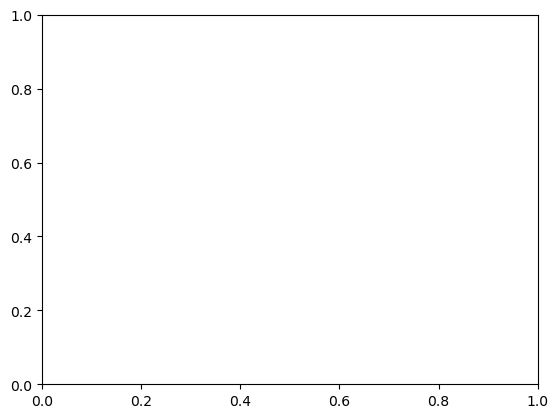

In [82]:
fig, ax = plt.subplots(len(job_titles),1)

for i, job_titles in enumerate(job_titles):
    df_plot = df_skills_prec[df_skills_prec['job_title_short'] == job_titles].head(5)
    df_plot.plot(kind='barh', x='job_skills', y= 'skill_precent', ax=ax[i], title=job_titles, legend=False)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()